<a href="https://colab.research.google.com/github/consar21/Customer-Insights-K-Means-Clustering/blob/main/Parallel_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


## Checking the resources

In [ ]:
import os
import psutil



# Number of logical threads
logical_threads = psutil.cpu_count(logical=True)
print(f"Logical cores : {logical_threads}")

# Number of physical cores
physical_cores = psutil.cpu_count(logical=False)
print(f"Physical cores: {physical_cores}")

# Threads per core
threads_per_core = logical_threads // physical_cores
print(f"Threads per core: {threads_per_core}")



Logical cores : 2
Physical cores: 1
Threads per core: 2


In [ ]:
!lscpu


Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4400.45
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

We have Hyper-threading:

a single core to act as two virtual processors in the environment.



Testing Multi Threading

In [ ]:
import threading
import time

def task(thread_id):
    print(f"Thread {thread_id} starting...")
    time.sleep(2)
    print(f"Thread {thread_id} finished.")

threads = []
for i in range(2):
    t = threading.Thread(target=task, args=(i,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

print("All threads completed.")


Thread 0 starting...
Thread 1 starting...
Thread 0 finished.
Thread 1 finished.
All threads completed.


## Sequential code


In [ ]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time



# Load customer data
data = pd.read_excel('/content/Mall_Customers_Extended.xlsx')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values


# Number of clusters and maximum iterations
k = 5
max_iters = 100

# Initialize centroids randomly from the data points
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Assign each data point to the nearest centroid
def assign_clusters(X, centroids):
    clusters = np.zeros(X.shape[0])
    for i, point in enumerate(X):
        min_dist = float('inf')
        for j, centroid in enumerate(centroids):
            dist = np.linalg.norm(point - centroid)
            if dist < min_dist:
                min_dist = dist
                clusters[i] = j
    return clusters

# Update centroids based on the mean of assigned data points
def update_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[np.where(clusters == i)]

        if len(points) > 0:
            centroids[i] = points.mean(axis=0)
    return centroids

# K-means clustering algorithm with timing accumulation
def kmeans(X, k, max_iters):
    centroids = initialize_centroids(X, k)

    # Initialize accumulators for timing
    total_assign_time = 0.0
    total_update_time = 0.0
    total_iteration_time = 0.0
    total_convergence_time = 0.0

    for iteration in range(max_iters):
        iter_start_time = time.time()

        # Measure assign_clusters time
        start_time = time.time()
        clusters = assign_clusters(X, centroids)
        assign_time = time.time() - start_time
        total_assign_time += assign_time

        # Measure update_centroids time
        start_time = time.time()
        new_centroids = update_centroids(X, clusters, k)
        update_time = time.time() - start_time
        total_update_time += update_time

        # Check for convergence
        start_time = time.time()
        converged = np.all(centroids == new_centroids)
        convergence_time = time.time() - start_time
        total_convergence_time += convergence_time

        # Measure total iteration time
        iter_time = assign_time + update_time + convergence_time
        total_iteration_time += iter_time

        # Check for convergence
        if converged:
           break
        centroids = new_centroids




    # Print out total times for each section
    print(f"Time for assign_clusters: {total_assign_time:.4f} seconds")
    print(f"Time for update_centroids: {total_update_time:.4f} seconds")
    print(f"Time for convergence check: {total_convergence_time:.4f} seconds")
    print(f"Total time for K-means Clustering algorithm: {total_iteration_time:.4f} seconds")



    return centroids, clusters, total_assign_time, total_update_time, total_iteration_time,total_convergence_time
centroids, clusters, total_assign_time, total_update_time, total_iteration_time,total_convergence_time = kmeans(X, k, max_iters)




Time for assign_clusters: 100.3145 seconds
Time for update_centroids: 0.2383 seconds
Time for convergence check: 0.0004 seconds
Total time for K-means Clustering algorithm: 100.5533 seconds


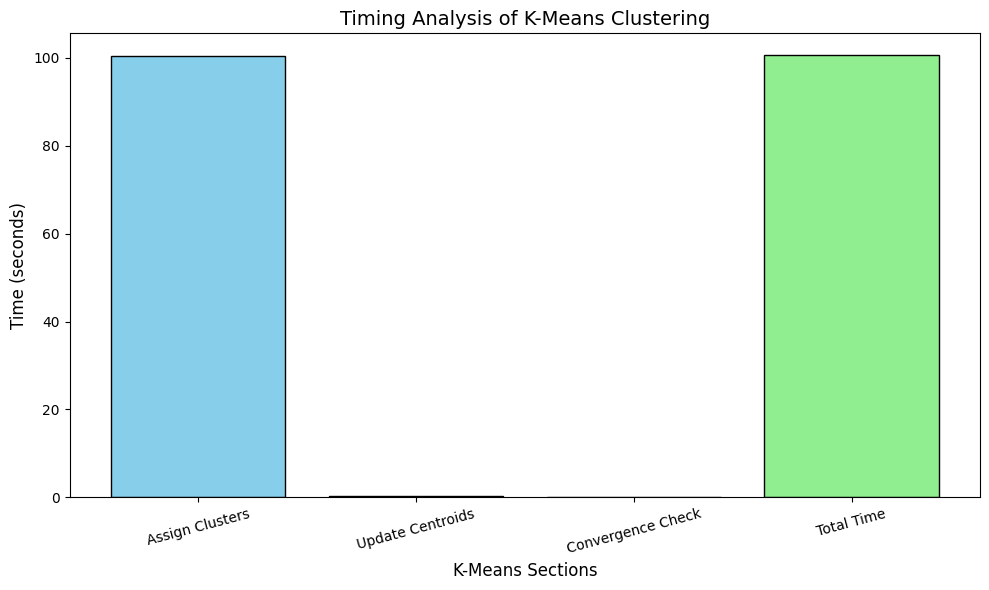

In [ ]:

# Sample data for time measurements (seconds)
sections = ['Assign Clusters', 'Update Centroids', 'Convergence Check', 'Total Time']
times = [total_assign_time, total_update_time, total_convergence_time, total_iteration_time]

import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sections, times, color=['skyblue', 'purple', 'orange', 'lightgreen'], edgecolor='black')
plt.title("Timing Analysis of K-Means Clustering", fontsize=14)
plt.xlabel("K-Means Sections", fontsize=12)
plt.ylabel("Time (seconds)", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Define descriptive labels based on the characteristics of clusters
cluster_labels = [
    "High Income, High Spend",
    "High Income, Low Spend",
    "Low Income, High Spend",
    "Low Income, Low Spend",
    "Moderate Income, Moderate Spend"
]


print_start_time = time.time()

print("Cluster Descriptions and Centroids:")
for i, label in enumerate(cluster_labels):
    print(f"\nCluster '{label}': Centroid at {centroids[i]}")
    print(f"Data Points in Cluster '{label}':\n", X[clusters == i])

print_time = time.time() - print_start_time
print(f"Total time for printing cluster descriptions and centroids: {(print_time)}")

Cluster Descriptions and Centroids:

Cluster 'High Income, High Spend': Centroid at [86.2197059  81.73448013]
Data Points in Cluster 'High Income, High Spend':
 [[69 91]
 [70 77]
 [71 95]
 ...
 [78 88]
 [75 99]
 [78 78]]

Cluster 'High Income, Low Spend': Centroid at [25.57164688 78.58689902]
Data Points in Cluster 'High Income, Low Spend':
 [[15 81]
 [16 77]
 [17 76]
 ...
 [24 67]
 [24 86]
 [35 59]]

Cluster 'Low Income, High Spend': Centroid at [25.46879056 20.10371681]
Data Points in Cluster 'Low Income, High Spend':
 [[15 39]
 [16  6]
 [17 40]
 ...
 [19 38]
 [18  7]
 [14 33]]

Cluster 'Low Income, Low Spend': Centroid at [54.89172216 49.08785691]
Data Points in Cluster 'Low Income, Low Spend':
 [[39 36]
 [39 61]
 [40 55]
 ...
 [61 51]
 [54 52]
 [60 41]]

Cluster 'Moderate Income, Moderate Spend': Centroid at [87.69912071 16.68592194]
Data Points in Cluster 'Moderate Income, Moderate Spend':
 [[ 70  29]
 [ 71  11]
 [ 71   9]
 ...
 [ 74  21]
 [106  20]
 [ 90  20]]
Total time for prin

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


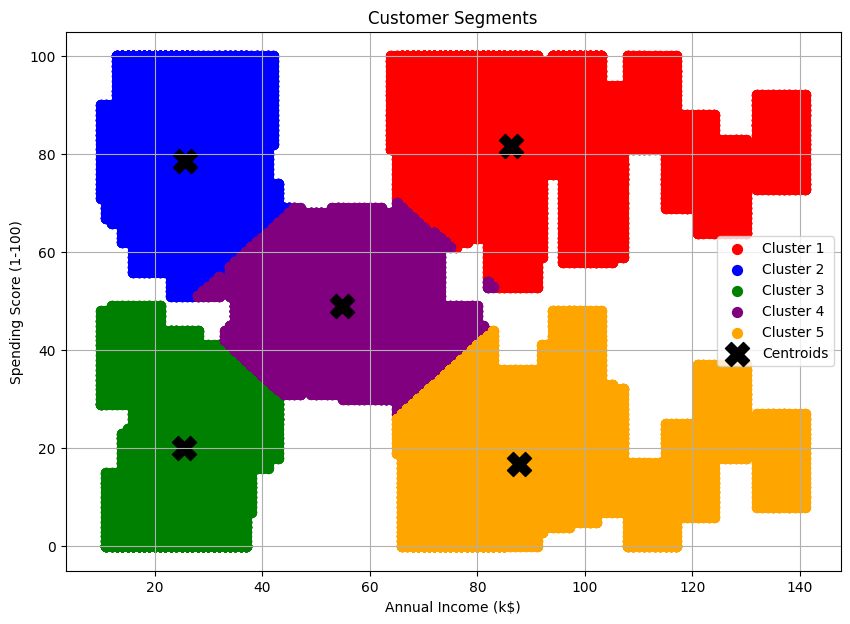

In [ ]:
# Visualize the results
def visualize_clusters(X, clusters, centroids):
    plt.figure(figsize=(10, 7))
    colors = ['red', 'blue', 'green', 'purple', 'orange']

    # Plot each cluster
    for i in range(k):
        points = X[clusters == i]
        plt.scatter(points[:, 0], points[:, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')

    plt.title('Customer Segments')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.grid()
    plt.show()


visualize_clusters(X, clusters, centroids)


##  Race Conditions
ASSIGNMENT 2 EXPERIMENTS


TASK#1 (1.5 Mark): Find 2-3 variables that produce a race condition. Explain why the variables produce race conditions.

TASK 1: Identify Variables Producing Race Conditions
Race conditions can occur when multiple threads/processes attempt to access and modify shared data simultaneously without proper synchronization.

Potential Variables with Race Conditions:
clusters: Shared across iterations and updated in assign_clusters.
Issue: If parallel threads/processes access and modify clusters concurrently, the assignments may interfere, leading to incorrect cluster labeling.
centroids: Shared across iterations and updated in update_centroids.
Issue: Parallel updates to centroids can overwrite each other, producing incorrect results.

TASK#2 (1 Mark): Run the code with the race conditions and see if you can catch the wrong results. Record the execution time.

# Detail logs of timing (Task_2 race conditions)




In [ ]:
import numpy as np
import pandas as pd
import time
from concurrent.futures import ThreadPoolExecutor

# Load customer data
data = pd.read_excel('/content/Mall_Customers_Extended.xlsx')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

k = 5
max_iters = 100

# Initialize centroids randomly
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Parallel version of assigning clusters
def assign_clusters_race(X, centroids, clusters):
    inconsistency_count = 0

    def process_point(i):
        nonlocal inconsistency_count
        min_dist = float('inf')
        best_cluster = -1
        for j, centroid in enumerate(centroids):
            dist = np.linalg.norm(X[i] - centroid)
            if dist < min_dist:
                min_dist = dist
                best_cluster = j

        # Check for inconsistency
        if clusters[i] != best_cluster:
            inconsistency_count += 1
        clusters[i] = best_cluster

    with ThreadPoolExecutor() as executor:
        executor.map(process_point, range(len(X)))

    return inconsistency_count

# Parallel version of updating centroids
def update_centroids_race(X, clusters, centroids):
    inconsistency_count = 0

    def update_cluster(i):
        nonlocal inconsistency_count
        points = X[np.where(clusters == i)]
        if len(points) > 0:
            old_centroid = np.copy(centroids[i])
            centroids[i] = points.mean(axis=0)
            # Check for inconsistency
            if not np.allclose(old_centroid, centroids[i]):
                inconsistency_count += 1

    with ThreadPoolExecutor() as executor:
        executor.map(update_cluster, range(k))

    return inconsistency_count

# K-means with race condition logs and timing
def kmeans_race_with_logs(X, k, max_iters):
    centroids = initialize_centroids(X, k)
    clusters = np.zeros(X.shape[0])

    # Timing variables
    total_assign_time = 0.0
    total_update_time = 0.0
    total_iteration_time = 0.0
    total_assign_inconsistencies = 0
    total_update_inconsistencies = 0

    for iteration in range(max_iters):
        print(f"--- Iteration {iteration} ---")
        iter_start_time = time.time()

        # Assign clusters
        start_time = time.time()
        assign_inconsistencies = assign_clusters_race(X, centroids, clusters)
        assign_time = time.time() - start_time
        total_assign_time += assign_time
        total_assign_inconsistencies += assign_inconsistencies

        # Update centroids
        start_time = time.time()
        update_inconsistencies = update_centroids_race(X, clusters, centroids)
        update_time = time.time() - start_time
        total_update_time += update_time
        total_update_inconsistencies += update_inconsistencies

        # Total iteration time
        iter_time = time.time() - iter_start_time
        total_iteration_time += iter_time

        # Convergence check
        new_centroids = np.copy(centroids)
        if np.allclose(centroids, new_centroids):
            print("Convergence achieved!")
            break
        centroids = new_centroids

    # Print timing details
    print(f"\nTotal time for assign_clusters: {total_assign_time:.4f} seconds")
    print(f"Total time for update_centroids: {total_update_time:.4f} seconds")
    print(f"Total time for K-means clustering algorithm: {total_iteration_time:.4f} seconds")
    print(f"Total assign inconsistencies: {total_assign_inconsistencies}")
    print(f"Total update inconsistencies: {total_update_inconsistencies}")

    return centroids, clusters, total_assign_time, total_update_time, total_iteration_time, total_assign_inconsistencies, total_update_inconsistencies


# Run race-condition-prone K-means with detailed logs and timing
start_time = time.time()
centroids, clusters, total_assign_time, total_update_time, total_iteration_time, total_assign_inconsistencies, total_update_inconsistencies = kmeans_race_with_logs(X, k, max_iters)
print(f"Execution time with race conditions: {time.time() - start_time:.4f} seconds")



--- Iteration 0 ---
Convergence achieved!

Total time for assign_clusters: 41.7823 seconds
Total time for update_centroids: 0.0321 seconds
Total time for K-means clustering algorithm: 41.8144 seconds
Total assign inconsistencies: 139872
Total update inconsistencies: 5
Execution time with race conditions: 41.8234 seconds


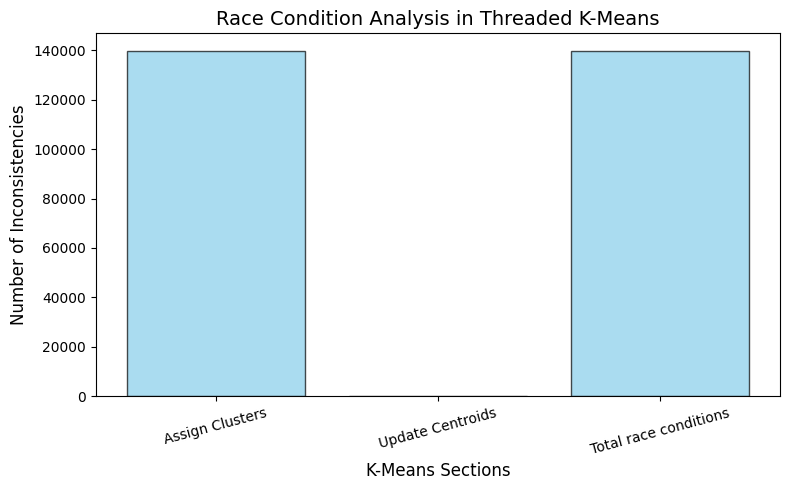

In [ ]:
assign_inconsistencies_count = total_assign_inconsistencies
update_inconsistencies_count = total_update_inconsistencies

# Labels and data
inconsistency_labels = ['Assign Clusters', 'Update Centroids',"Total race conditions"]
inconsistency_counts = [assign_inconsistencies_count, update_inconsistencies_count,assign_inconsistencies_count+update_inconsistencies_count]

# Create a bar chart for inconsistencies
plt.figure(figsize=(8, 5))
plt.bar(inconsistency_labels, inconsistency_counts, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Race Condition Analysis in Threaded K-Means", fontsize=14)
plt.xlabel("K-Means Sections", fontsize=12)
plt.ylabel("Number of Inconsistencies", fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



# Detail log of race conditions (Task 2 all race conditions)


In [ ]:
import numpy as np
import pandas as pd
import time
from concurrent.futures import ThreadPoolExecutor

# Load customer data
data = pd.read_excel('/content/Mall_Customers_Extended.xlsx')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

k = 5
max_iters = 100

# Initialize centroids randomly
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Assign clusters with amplified race conditions
def assign_clusters_race(X, centroids, clusters):
    inconsistencies = []

    def process_point(i):
        min_dist = float('inf')
        best_cluster = -1
        for j, centroid in enumerate(centroids):
            dist = np.linalg.norm(X[i] - centroid)
            if dist < min_dist:
                min_dist = dist
                best_cluster = j

        # Simulate a delay to increase the chance of contention
        time.sleep(0.001)

        # Introduce conflict by forcing simultaneous writes
        clusters[i] = best_cluster  # Overwrite without safety

        # Log potential inconsistencies
        inconsistencies.append({
            "index": i,
            "new_value": best_cluster,
            "reason": "Simulated high contention during cluster assignment"
        })

    with ThreadPoolExecutor(max_workers=32) as executor:  # Increase threads
        executor.map(process_point, range(len(X)))

    return inconsistencies

# Update centroids with amplified race conditions
def update_centroids_race(X, clusters, centroids):
    inconsistencies = []

    def update_cluster(i):
        points = X[np.where(clusters == i)]
        if len(points) > 0:
            old_centroid = np.copy(centroids[i])
            time.sleep(0.001)  # Add delay for contention
            centroids[i] = points.mean(axis=0)  # Potential simultaneous updates

            # Log potential inconsistencies
            inconsistencies.append({
                "cluster_index": i,
                "old_centroid": old_centroid.tolist(),
                "new_centroid": centroids[i].tolist(),
                "reason": "Simulated high contention during centroid update"
            })

    with ThreadPoolExecutor(max_workers=32) as executor:  # Increase threads
        executor.map(update_cluster, range(k))

    return inconsistencies

# K-means with race condition logs and timing
def kmeans_race_with_logs(X, k, max_iters):
    centroids = initialize_centroids(X, k)
    clusters = np.zeros(X.shape[0])

    # Timing variables
    total_assign_time = 0.0
    total_update_time = 0.0
    total_iteration_time = 0.0

    # Race condition counters
    total_assign_inconsistencies = 0
    total_update_inconsistencies = 0

    for iteration in range(max_iters):
        print(f"--- Iteration {iteration} ---")
        iter_start_time = time.time()

        # Assign clusters
        start_time = time.time()
        assign_inconsistencies = assign_clusters_race(X, centroids, clusters)
        assign_time = time.time() - start_time
        total_assign_time += assign_time
        total_assign_inconsistencies += len(assign_inconsistencies)
        if assign_inconsistencies:
            for inc in assign_inconsistencies:
                print(f"Race condition detected during cluster assignment: {inc}")

        # Update centroids
        start_time = time.time()
        update_inconsistencies = update_centroids_race(X, clusters, centroids)
        update_time = time.time() - start_time
        total_update_time += update_time
        total_update_inconsistencies += len(update_inconsistencies)
        if update_inconsistencies:
            for inc in update_inconsistencies:
                print(f"Race condition detected during centroid update: {inc}")

        # Total iteration time
        iter_time = time.time() - iter_start_time
        total_iteration_time += iter_time

        # Convergence check
        new_centroids = np.copy(centroids)
        if np.allclose(centroids, new_centroids):
            print("Convergence achieved!")
            break
        centroids = new_centroids

    # Print timing details and total inconsistencies
    print(f"\nTotal time for assign_clusters: {total_assign_time:.4f} seconds")
    print(f"Total time for update_centroids: {total_update_time:.4f} seconds")
    print(f"Total time for K-means clustering algorithm: {total_iteration_time:.4f} seconds")
    print(f"\nTotal race conditions during cluster assignment: {total_assign_inconsistencies}")
    print(f"Total race conditions during centroid update: {total_update_inconsistencies}")
    print(f"Total race conditions: {total_assign_inconsistencies + total_update_inconsistencies}")

    return centroids, clusters

# Run race-condition-prone K-means with detailed logs and timing
start_time = time.time()
centroids, clusters = kmeans_race_with_logs(X, k, max_iters)
print(f"Execution time with race conditions: {time.time() - start_time:.4f} seconds")


Streaming output truncated to the last 5000 lines.
Race condition detected during cluster assignment: {'index': 295212, 'new_value': 4, 'reason': 'Simulated high contention during cluster assignment'}
Race condition detected during cluster assignment: {'index': 295214, 'new_value': 0, 'reason': 'Simulated high contention during cluster assignment'}
Race condition detected during cluster assignment: {'index': 295217, 'new_value': 3, 'reason': 'Simulated high contention during cluster assignment'}
Race condition detected during cluster assignment: {'index': 295218, 'new_value': 0, 'reason': 'Simulated high contention during cluster assignment'}
Race condition detected during cluster assignment: {'index': 295221, 'new_value': 4, 'reason': 'Simulated high contention during cluster assignment'}
Race condition detected during cluster assignment: {'index': 295220, 'new_value': 0, 'reason': 'Simulated high contention during cluster assignment'}
Race condition detected during cluster assignment

# TASK#3
(1.5 Mark): Run the code with various options (critical, atomic, reduction) of solving the race condition and see both the result and the execution time.

##(critical, atomic, reduction)


Running K-means with Critical Section (ThreadPoolExecutor)...
Total time for assign_clusters: 41.1465 seconds
Total time for update_centroids: 0.0218 seconds
Total time for K-means: 41.1684 seconds
Execution time for Critical Section (ThreadPoolExecutor): 41.2010 seconds


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


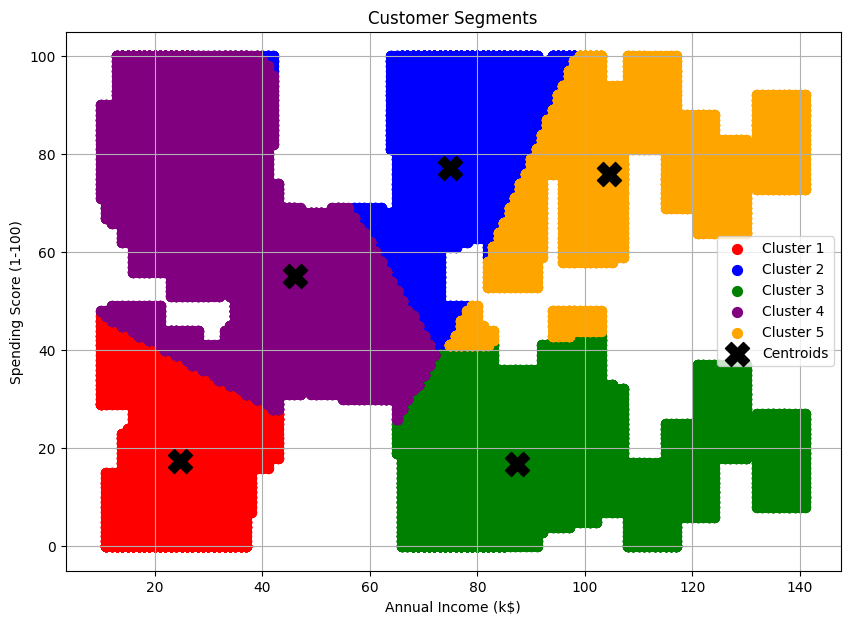


Running K-means with Reduction Technique...
Total time for assign_clusters: 19.1125 seconds
Total time for update_centroids: 0.1543 seconds
Total time for K-means: 19.2667 seconds
Execution time for Reduction Technique: 19.4198 seconds


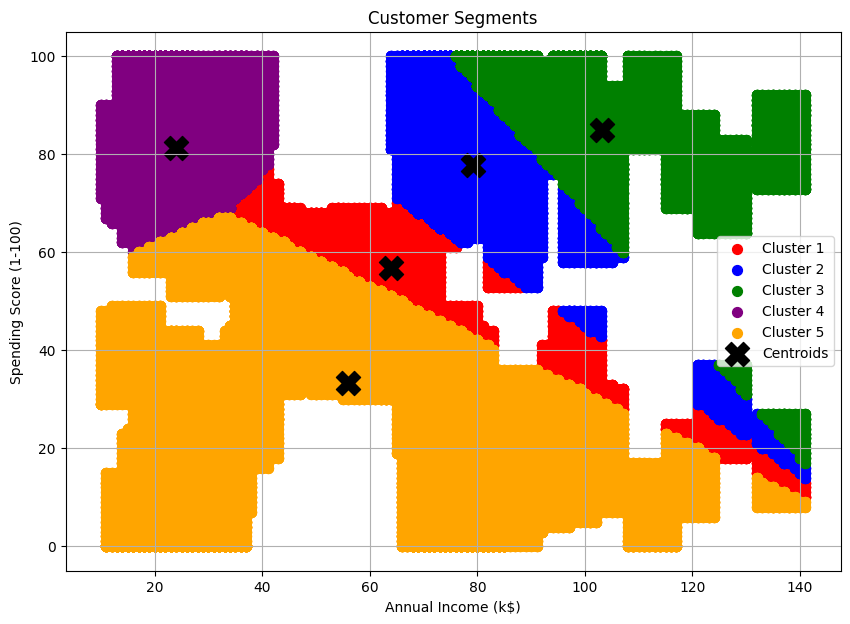


Running K-means with Atomic Operations...
Total time for assign_clusters: 19.7417 seconds
Total time for update_centroids: 0.0782 seconds
Total time for K-means: 19.8199 seconds
Execution time for Atomic Operations: 19.9880 seconds


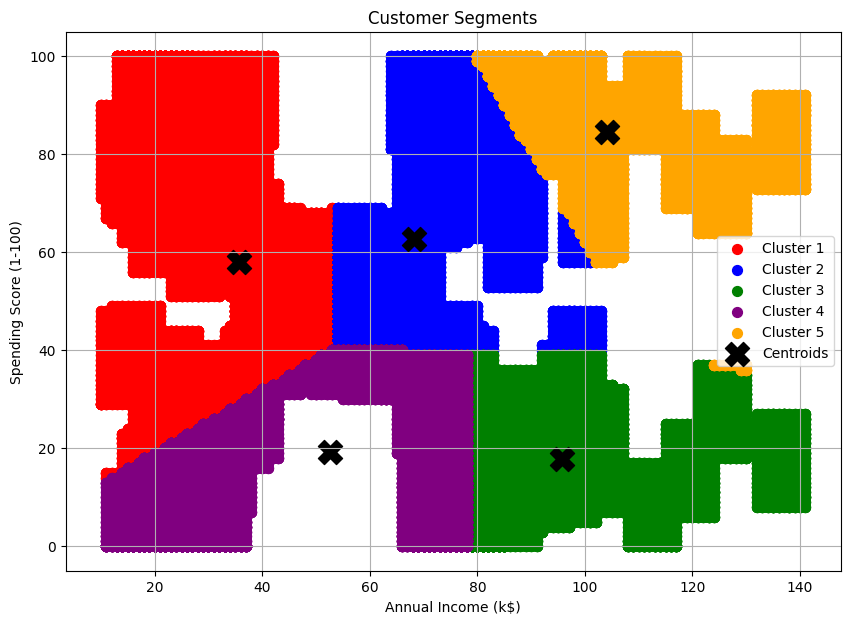

In [ ]:
import numpy as np
import pandas as pd
import time
from threading import Lock
from joblib import Parallel, delayed

# Load customer data
data = pd.read_excel('/content/Mall_Customers_Extended.xlsx')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

k = 5
max_iters = 100

# Initialize centroids randomly
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# ---------------- Critical Section Implementation ---------------
from concurrent.futures import ThreadPoolExecutor

# Assign clusters using Critical Section with ThreadPoolExecutor
def assign_clusters_critical(X, centroids):
    clusters = np.zeros(X.shape[0], dtype=int)
    lock = Lock()

    def assign_point(i):
        min_dist = float('inf')
        best_cluster = -1
        for j, centroid in enumerate(centroids):
            dist = np.linalg.norm(X[i] - centroid)
            if dist < min_dist:
                min_dist = dist
                best_cluster = j
        with lock:  # Critical section
            clusters[i] = best_cluster

    with ThreadPoolExecutor() as executor:
        executor.map(assign_point, range(len(X)))
    return clusters

# Update centroids using Critical Section with ThreadPoolExecutor
def update_centroids_critical(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    lock = Lock()

    def update_cluster(i):
        points = X[clusters == i]
        if len(points) > 0:
            new_centroid = points.mean(axis=0)
            with lock:  # Critical section
                centroids[i] = new_centroid

    with ThreadPoolExecutor() as executor:
        executor.map(update_cluster, range(k))
    return centroids


# ---------------- Reduction Technique Implementation ----------------
# Assign clusters using Reduction Technique
def assign_clusters_reduction(X, centroids):
    clusters = np.zeros(X.shape[0], dtype=int)

    def assign_point(i):
        min_dist = float('inf')
        best_cluster = -1
        for j, centroid in enumerate(centroids):
            dist = np.linalg.norm(X[i] - centroid)
            if dist < min_dist:
                min_dist = dist
                best_cluster = j
        return i, best_cluster

    results = Parallel(n_jobs=-1)(delayed(assign_point)(i) for i in range(len(X)))
    for i, best_cluster in results:
        clusters[i] = best_cluster
    return clusters

# Update centroids using Reduction Technique
def update_centroids_reduction(X, clusters, k):
    partial_sums = [np.zeros(X.shape[1]) for _ in range(k)]
    partial_counts = [0 for _ in range(k)]

    def compute_partial_sum(i):
        points = X[clusters == i]
        if len(points) > 0:
            return i, points.sum(axis=0), len(points)
        return i, np.zeros(X.shape[1]), 0

    results = Parallel(n_jobs=-1)(delayed(compute_partial_sum)(i) for i in range(k))
    for i, sum_values, count in results:
        partial_sums[i] += sum_values
        partial_counts[i] += count

    centroids = np.array([partial_sums[i] / partial_counts[i] if partial_counts[i] > 0 else np.zeros(X.shape[1]) for i in range(k)])
    return centroids

# ---------------- Atomic Operations Implementation ----------------
# Assign clusters using Atomic Operations
def assign_clusters_atomic(X, centroids):
    clusters = np.zeros(X.shape[0], dtype=int)

    def assign_point(i):
        min_dist = float('inf')
        best_cluster = -1
        for j, centroid in enumerate(centroids):
            dist = np.linalg.norm(X[i] - centroid)
            if dist < min_dist:
                min_dist = dist
                best_cluster = j
        return i, best_cluster

    results = Parallel(n_jobs=-1)(delayed(assign_point)(i) for i in range(len(X)))
    for i, best_cluster in results:
        clusters[i] = best_cluster
    return clusters

# Update centroids using Atomic Operations
def update_centroids_atomic(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    counts = np.zeros(k, dtype=int)

    def update_atomic(i):
        points = X[np.where(clusters == i)]
        if len(points) > 0:
            return i, points.sum(axis=0), len(points)
        return i, np.zeros(X.shape[1]), 0

    results = Parallel(n_jobs=-1)(delayed(update_atomic)(i) for i in range(k))
    for i, sum_values, count in results:
        np.add.at(centroids, i, sum_values)  # Atomic addition for thread-safe updates
        np.add.at(counts, i, count)

    # Avoid division by zero
    for i in range(k):
        if counts[i] > 0:
            centroids[i] /= counts[i]

    return centroids

# ---------------- General K-Means Runner ----------------
def kmeans_parallel(X, k, max_iters, assign_func, update_func):
    centroids = initialize_centroids(X, k)
    clusters = np.zeros(X.shape[0])

    total_assign_time = 0.0
    total_update_time = 0.0

    for iteration in range(max_iters):
        # Assign clusters
        start_time = time.time()
        clusters = assign_func(X, centroids)
        assign_time = time.time() - start_time
        total_assign_time += assign_time

        # Update centroids
        start_time = time.time()
        centroids = update_func(X, clusters, k)
        update_time = time.time() - start_time
        total_update_time += update_time

        # Check for convergence
        if np.allclose(centroids, update_func(X, clusters, k)):
            break

    print(f"Total time for assign_clusters: {total_assign_time:.4f} seconds")
    print(f"Total time for update_centroids: {total_update_time:.4f} seconds")
    print(f"Total time for K-means: {total_assign_time + total_update_time:.4f} seconds")
    return centroids, clusters

# ---------------- Testing All Methods ----------------
# Testing all methods
for method, assign_func, update_func in [
    ("Critical Section (ThreadPoolExecutor)", assign_clusters_critical, update_centroids_critical),
    ("Reduction Technique", assign_clusters_reduction, update_centroids_reduction),
    ("Atomic Operations", assign_clusters_atomic, update_centroids_atomic),
]:
    print(f"\nRunning K-means with {method}...")
    start_time = time.time()
    centroids, clusters = kmeans_parallel(X, k, max_iters, assign_func, update_func)
    print(f"Execution time for {method}: {time.time() - start_time:.4f} seconds")
    visualize_clusters(X, clusters, centroids)




# code with graph and plots

In [ ]:
import numpy as np
import pandas as pd
import time
from threading import Lock
from joblib import Parallel, delayed
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

# Load customer data
data = pd.read_excel('/content/Mall_Customers_Extended.xlsx')  # Update file path if necessary
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

k = 5
max_iters = 100

# Initialize centroids randomly
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Assign clusters using Critical Section with ThreadPoolExecutor
def assign_clusters_critical(X, centroids):
    clusters = np.zeros(X.shape[0], dtype=int)
    lock = Lock()

    def assign_point(i):
        min_dist = float('inf')
        best_cluster = -1
        for j, centroid in enumerate(centroids):
            dist = np.linalg.norm(X[i] - centroid)
            if dist < min_dist:
                min_dist = dist
                best_cluster = j
        with lock:  # Critical section
            clusters[i] = best_cluster

    with ThreadPoolExecutor() as executor:
        executor.map(assign_point, range(len(X)))
    return clusters

# Update centroids using Critical Section with ThreadPoolExecutor
def update_centroids_critical(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    lock = Lock()

    def update_cluster(i):
        points = X[clusters == i]
        if len(points) > 0:
            new_centroid = points.mean(axis=0)
            with lock:  # Critical section
                centroids[i] = new_centroid

    with ThreadPoolExecutor() as executor:
        executor.map(update_cluster, range(k))
    return centroids

# Assign clusters using Reduction Technique
def assign_clusters_reduction(X, centroids):
    clusters = np.zeros(X.shape[0], dtype=int)

    def assign_point(i):
        min_dist = float('inf')
        best_cluster = -1
        for j, centroid in enumerate(centroids):
            dist = np.linalg.norm(X[i] - centroid)
            if dist < min_dist:
                min_dist = dist
                best_cluster = j
        return i, best_cluster

    results = Parallel(n_jobs=-1)(delayed(assign_point)(i) for i in range(len(X)))
    for i, best_cluster in results:
        clusters[i] = best_cluster
    return clusters

# Update centroids using Reduction Technique
def update_centroids_reduction(X, clusters, k):
    partial_sums = [np.zeros(X.shape[1]) for _ in range(k)]
    partial_counts = [0 for _ in range(k)]

    def compute_partial_sum(i):
        points = X[clusters == i]
        if len(points) > 0:
            return i, points.sum(axis=0), len(points)
        return i, np.zeros(X.shape[1]), 0

    results = Parallel(n_jobs=-1)(delayed(compute_partial_sum)(i) for i in range(k))
    for i, sum_values, count in results:
        partial_sums[i] += sum_values
        partial_counts[i] += count

    centroids = np.array([partial_sums[i] / partial_counts[i] if partial_counts[i] > 0 else np.zeros(X.shape[1]) for i in range(k)])
    return centroids

# Assign clusters using Atomic Operations
def assign_clusters_atomic(X, centroids):
    clusters = np.zeros(X.shape[0], dtype=int)

    def assign_point(i):
        min_dist = float('inf')
        best_cluster = -1
        for j, centroid in enumerate(centroids):
            dist = np.linalg.norm(X[i] - centroid)
            if dist < min_dist:
                min_dist = dist
                best_cluster = j
        return i, best_cluster

    results = Parallel(n_jobs=-1)(delayed(assign_point)(i) for i in range(len(X)))
    for i, best_cluster in results:
        clusters[i] = best_cluster
    return clusters

# Update centroids using Atomic Operations
def update_centroids_atomic(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    counts = np.zeros(k, dtype=int)

    def update_atomic(i):
        points = X[np.where(clusters == i)]
        if len(points) > 0:
            return i, points.sum(axis=0), len(points)
        return i, np.zeros(X.shape[1]), 0

    results = Parallel(n_jobs=-1)(delayed(update_atomic)(i) for i in range(k))
    for i, sum_values, count in results:
        np.add.at(centroids, i, sum_values)  # Atomic addition for thread-safe updates
        np.add.at(counts, i, count)

    for i in range(k):
        if counts[i] > 0:
            centroids[i] /= counts[i]

    return centroids

# General K-Means Runner
def kmeans_parallel(X, k, max_iters, assign_func, update_func):
    centroids = initialize_centroids(X, k)
    clusters = np.zeros(X.shape[0])

    total_assign_time = 0.0
    total_update_time = 0.0

    for iteration in range(max_iters):
        # Assign clusters
        start_time = time.time()
        clusters = assign_func(X, centroids)
        assign_time = time.time() - start_time
        total_assign_time += assign_time

        # Update centroids
        start_time = time.time()
        centroids = update_func(X, clusters, k)
        update_time = time.time() - start_time
        total_update_time += update_time

        # Check for convergence
        if np.allclose(centroids, update_func(X, clusters, k)):
            break

    total_time = total_assign_time + total_update_time
    print(f"Total time for assign_clusters: {total_assign_time:.4f} seconds")
    print(f"Total time for update_centroids: {total_update_time:.4f} seconds")
    print(f"Total time for K-means: {total_time:.4f} seconds")
    return centroids, clusters, total_time

# Testing all methods and visualizing results
methods = [
    ("Critical Section ", assign_clusters_critical, update_centroids_critical),
    ("Reduction Technique", assign_clusters_reduction, update_centroids_reduction),
    ("Atomic Operations", assign_clusters_atomic, update_centroids_atomic),
]

timing_results = {}
for method, assign_func, update_func in methods:
    print(f"\nRunning K-means with {method}...")
    _, _, total_time = kmeans_parallel(X, k, max_iters, assign_func, update_func)
    timing_results[method] = total_time
    print(f"Execution time for {method}: {total_time:.4f} seconds")





Running K-means with Critical Section ...
Total time for assign_clusters: 38.8064 seconds
Total time for update_centroids: 0.0207 seconds
Total time for K-means: 38.8271 seconds
Execution time for Critical Section : 38.8271 seconds

Running K-means with Reduction Technique...
Total time for assign_clusters: 18.6295 seconds
Total time for update_centroids: 0.1473 seconds
Total time for K-means: 18.7768 seconds
Execution time for Reduction Technique: 18.7768 seconds

Running K-means with Atomic Operations...
Total time for assign_clusters: 19.1917 seconds
Total time for update_centroids: 0.1715 seconds
Total time for K-means: 19.3632 seconds
Execution time for Atomic Operations: 19.3632 seconds


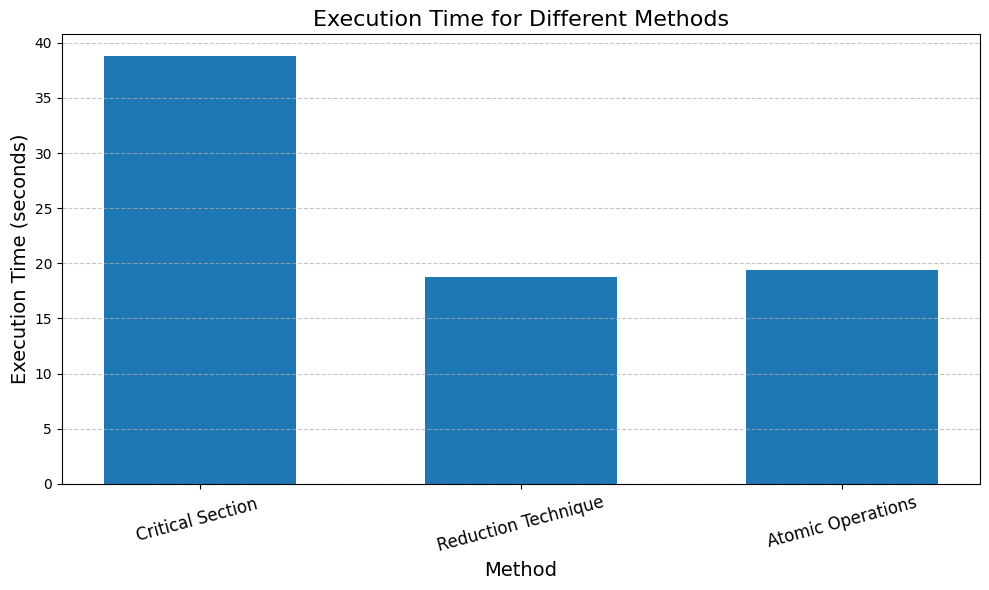

In [ ]:
# Plotting the execution times
plt.figure(figsize=(10, 6))
plt.bar(timing_results.keys(), timing_results.values(), width=0.6)
plt.title("Execution Time for Different Methods", fontsize=16)
plt.ylabel("Execution Time (seconds)", fontsize=14)
plt.xlabel("Method", fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## TASK#4
(1 Mark): Analyze which code is faster. Analyze the execution of all options. Try out 1, 2, 4, 8 cores, depending on your availability.

Locally



Testing Critical Section across different core counts...
  Running with 1 cores...
    Execution time: 10.7795 seconds
  Running with 2 cores...
    Execution time: 18.7750 seconds
  Running with 4 cores...
    Execution time: 21.4290 seconds
  Running with 8 cores...
    Execution time: 22.2900 seconds

Testing Reduction Technique across different core counts...
  Running with 1 cores...
    Execution time: 10.8720 seconds
  Running with 2 cores...
    Execution time: 18.9804 seconds
  Running with 4 cores...
    Execution time: 21.4761 seconds
  Running with 8 cores...
    Execution time: 21.8270 seconds

Testing Atomic Operations across different core counts...
  Running with 1 cores...
    Execution time: 10.9812 seconds
  Running with 2 cores...
    Execution time: 19.3252 seconds
  Running with 4 cores...
    Execution time: 20.4568 seconds
  Running with 8 cores...
    Execution time: 23.2085 seconds


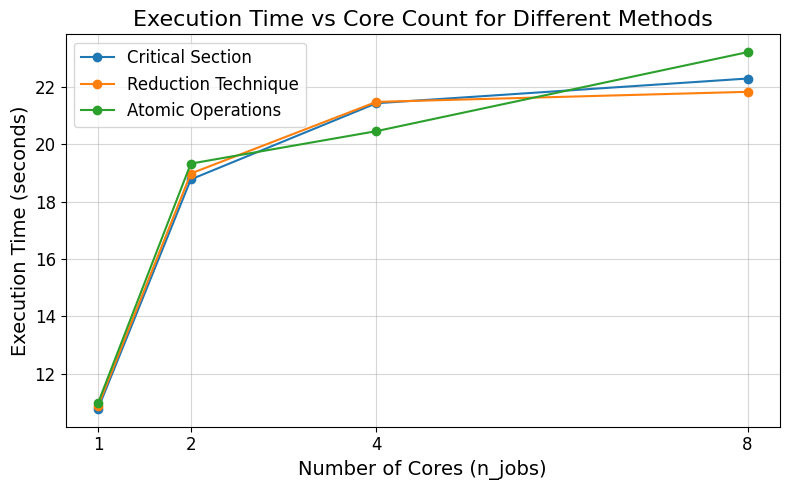

In [ ]:
import numpy as np
import pandas as pd
import time
from threading import Lock
from joblib import Parallel, delayed
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

# ---------------- File Loading ----------------
def load_data(file_path):
    # Load customer data
    data = pd.read_excel(file_path)
    X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
    return X

# ---------------- K-Means Initialization ----------------
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# ---------------- Core Adjusted Functions ----------------
def kmeans_parallel_with_cores(X, k, max_iters, assign_func, update_func, n_jobs):
    # Adjust functions for core count
    def assign_clusters_core_adjusted(X, centroids):
        clusters = np.zeros(X.shape[0], dtype=int)

        def assign_point(i):
            min_dist = float('inf')
            best_cluster = -1
            for j, centroid in enumerate(centroids):
                dist = np.linalg.norm(X[i] - centroid)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = j
            return i, best_cluster

        results = Parallel(n_jobs=n_jobs)(delayed(assign_point)(i) for i in range(len(X)))
        for i, best_cluster in results:
            clusters[i] = best_cluster
        return clusters

    def update_centroids_core_adjusted(X, clusters, k):
        partial_sums = [np.zeros(X.shape[1]) for _ in range(k)]
        partial_counts = [0 for _ in range(k)]

        def compute_partial_sum(i):
            points = X[clusters == i]
            if len(points) > 0:
                return i, points.sum(axis=0), len(points)
            return i, np.zeros(X.shape[1]), 0

        results = Parallel(n_jobs=n_jobs)(delayed(compute_partial_sum)(i) for i in range(k))
        for i, sum_values, count in results:
            partial_sums[i] += sum_values
            partial_counts[i] += count

        centroids = np.array(
            [partial_sums[i] / partial_counts[i] if partial_counts[i] > 0 else np.zeros(X.shape[1]) for i in range(k)]
        )
        return centroids

    # Replace function with adjusted version
    assign_func = assign_clusters_core_adjusted
    update_func = update_centroids_core_adjusted

    # Run K-means and calculate time
    centroids = initialize_centroids(X, k)
    clusters = np.zeros(X.shape[0])
    total_time = 0.0

    for iteration in range(max_iters):
        start_time = time.time()
        clusters = assign_func(X, centroids)
        centroids = update_func(X, clusters, k)
        total_time += time.time() - start_time
        if np.allclose(centroids, update_func(X, clusters, k)):
            break

    return total_time

# ---------------- Testing All Methods ----------------
def test_methods_with_core_scaling(X, k, max_iters, core_counts):
    methods = [
        ("Critical Section", assign_clusters_critical, update_centroids_critical),
        ("Reduction Technique", assign_clusters_reduction, update_centroids_reduction),
        ("Atomic Operations", assign_clusters_atomic, update_centroids_atomic),
    ]

    results = {}
    for method, assign_func, update_func in methods:
        print(f"\nTesting {method} across different core counts...")
        method_times = []
        for cores in core_counts:
            print(f"  Running with {cores} cores...")
            execution_time = kmeans_parallel_with_cores(X, k, max_iters, assign_func, update_func, cores)
            method_times.append(execution_time)
            print(f"    Execution time: {execution_time:.4f} seconds")
        results[method] = method_times

    return results

# ---------------- Visualization ----------------
def plot_results(results, core_counts):
    plt.figure(figsize=(8, 5))
    for method, times in results.items():
        plt.plot(core_counts, times, label=method, marker='o')
    plt.title("Execution Time vs Core Count for Different Methods", fontsize=16)
    plt.xlabel("Number of Cores (n_jobs)", fontsize=14)
    plt.ylabel("Execution Time (seconds)", fontsize=14)
    plt.xticks(core_counts, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# ---------------- Main Execution ----------------
if __name__ == "__main__":
    # Load data
    file_path = '/content/Mall_Customers_Extended.xlsx'  # Update to your file path
    X = load_data(file_path)

    # Parameters
    k = 5
    max_iters = 100
    core_counts = [1, 2, 4, 8]  # Adjust based on your machine's capabilities

    # Test all methods and plot results
    results = test_methods_with_core_scaling(X, k, max_iters, core_counts)
    plot_results(results, core_counts)



Testing Critical Section across different core counts...
  Running with 1 cores...
    Execution time: 10.8878 seconds
  Running with 2 cores...
    Execution time: 18.6975 seconds

Testing Reduction Technique across different core counts...
  Running with 1 cores...
    Execution time: 10.7913 seconds
  Running with 2 cores...
    Execution time: 18.6724 seconds

Testing Atomic Operations across different core counts...
  Running with 1 cores...
    Execution time: 10.7676 seconds
  Running with 2 cores...
    Execution time: 18.7463 seconds


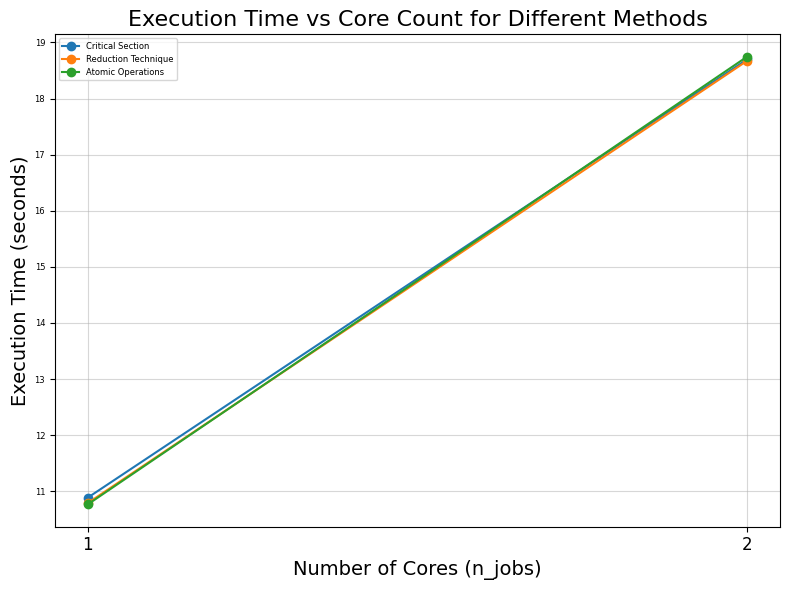

In [ ]:
import numpy as np
import pandas as pd
import time
from threading import Lock
from joblib import Parallel, delayed
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

# ---------------- File Loading ----------------
def load_data(file_path):
    # Load customer data
    data = pd.read_excel(file_path)
    X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
    return X

# ---------------- K-Means Initialization ----------------
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# ---------------- Core Adjusted Functions ----------------
def kmeans_parallel_with_cores(X, k, max_iters, assign_func, update_func, n_jobs):
    # Adjust functions for core count
    def assign_clusters_core_adjusted(X, centroids):
        clusters = np.zeros(X.shape[0], dtype=int)

        def assign_point(i):
            min_dist = float('inf')
            best_cluster = -1
            for j, centroid in enumerate(centroids):
                dist = np.linalg.norm(X[i] - centroid)
                if dist < min_dist:
                    min_dist = dist
                    best_cluster = j
            return i, best_cluster

        results = Parallel(n_jobs=n_jobs)(delayed(assign_point)(i) for i in range(len(X)))
        for i, best_cluster in results:
            clusters[i] = best_cluster
        return clusters

    def update_centroids_core_adjusted(X, clusters, k):
        partial_sums = [np.zeros(X.shape[1]) for _ in range(k)]
        partial_counts = [0 for _ in range(k)]

        def compute_partial_sum(i):
            points = X[clusters == i]
            if len(points) > 0:
                return i, points.sum(axis=0), len(points)
            return i, np.zeros(X.shape[1]), 0

        results = Parallel(n_jobs=n_jobs)(delayed(compute_partial_sum)(i) for i in range(k))
        for i, sum_values, count in results:
            partial_sums[i] += sum_values
            partial_counts[i] += count

        centroids = np.array(
            [partial_sums[i] / partial_counts[i] if partial_counts[i] > 0 else np.zeros(X.shape[1]) for i in range(k)]
        )
        return centroids

    # Replace function with adjusted version
    assign_func = assign_clusters_core_adjusted
    update_func = update_centroids_core_adjusted

    # Run K-means and calculate time
    centroids = initialize_centroids(X, k)
    clusters = np.zeros(X.shape[0])
    total_time = 0.0

    for iteration in range(max_iters):
        start_time = time.time()
        clusters = assign_func(X, centroids)
        centroids = update_func(X, clusters, k)
        total_time += time.time() - start_time
        if np.allclose(centroids, update_func(X, clusters, k)):
            break

    return total_time

# ---------------- Testing All Methods ----------------
def test_methods_with_core_scaling(X, k, max_iters, core_counts):
    methods = [
        ("Critical Section", assign_clusters_critical, update_centroids_critical),
        ("Reduction Technique", assign_clusters_reduction, update_centroids_reduction),
        ("Atomic Operations", assign_clusters_atomic, update_centroids_atomic),
    ]

    results = {}
    for method, assign_func, update_func in methods:
        print(f"\nTesting {method} across different core counts...")
        method_times = []
        for cores in core_counts:
            print(f"  Running with {cores} cores...")
            execution_time = kmeans_parallel_with_cores(X, k, max_iters, assign_func, update_func, cores)
            method_times.append(execution_time)
            print(f"    Execution time: {execution_time:.4f} seconds")
        results[method] = method_times

    return results

# ---------------- Visualization ----------------
def plot_results(results, core_counts):
    plt.figure(figsize=(8, 6))
    for method, times in results.items():
        plt.plot(core_counts, times, label=method, marker='o')
    plt.title("Execution Time vs Core Count for Different Methods", fontsize=16)
    plt.xlabel("Number of Cores (n_jobs)", fontsize=14)
    plt.ylabel("Execution Time (seconds)", fontsize=14)
    plt.xticks(core_counts, fontsize=12)
    plt.yticks(fontsize=6)
    plt.legend(fontsize=6)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

# ---------------- Main Execution ----------------
if __name__ == "__main__":
    # Load data
    file_path = '/content/Mall_Customers_Extended.xlsx'
    X = load_data(file_path)

    # Parameters
    k = 5
    max_iters = 100
    core_counts = [1, 2]

    # Test all methods and plot results
    results = test_methods_with_core_scaling(X, k, max_iters, core_counts)
    plot_results(results, core_counts)
